In [3]:
import pandas as pd
import shap
data = pd.read_csv("../../samples/lidl_train.csv")
data.dropna(inplace=True)

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


In [4]:
low_rated = """Quit it with the forced updates . Yet again today , in the queue turned it on , update.. all i wanted was to get a digital reciept for electrical purchases, but no wouldnt let me scan. Judt update. At the checkout with lousy mobile coverage is not the place to find out there is an update out..thanks for your answer i understand apps need updating . But its the forced nature of your updates.. ""do nothing until its updated"" at least let us scan the code as a minimum.before updating."""
low_score = 0

high_rated = """It's a good app and the savings are better than other loyalty schemes. The scratch card seems a bit of a gimmick but otherwise it's a good app and recommended. Also shows how busy the shop is and opening hours 👍"""
high_score = 4

# data = pd.DataFrame({"review": [low_rated, high_rated], "rating": [low_score, high_score]})
data

,rating,review,date
0,5,"Always have what I need, fresh good quality fo...",2022-05-30
1,5,Excellent,2023-10-27
2,5,Great,2021-12-22
3,1,Very deceptive sales. Make sure to read all of...,2023-12-22
4,4,Easy to use,2022-09-30
...,...,...,...
27235,5,Extremely good value for money with a wonderfu...,2022-06-07
27236,4,Always look forward to money off coupons each ...,2023-01-12
27237,5,Good,2022-09-16
27238,5,excellent,2024-02-09


In [5]:
from joblib import load
from sklearn.pipeline import Pipeline
# model = load("./results/train/MultinomialNB/MultinomialNB_lidl_2024-04-03_11-55-30.pkl")
model = load("../../results/train/MultinomialNB/MultinomialNB_lidl_2024-04-03_11-55-30.pkl")
# shap does not work with the grid search model
pipeline = model.best_estimator_
clf = pipeline.named_steps["clf"]
vect = pipeline.named_steps["vect"]
tfidf = pipeline.named_steps["tfidf"]
pipeline = Pipeline([("vect", vect), ("tfidf", tfidf)])

In [6]:
X_train = pipeline.transform(data["review"]).toarray()
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [7]:
prediction = clf.predict(X_train)[0]
predicted_class_idx = list(clf.classes_).index(prediction)

In [8]:
pipeline.transform([high_rated]).toarray()

array([[0., 0., 0., ..., 0., 0., 0.]])

100%|██████████| 1/1 [00:05<00:00,  5.61s/it]


2.7800000000000002


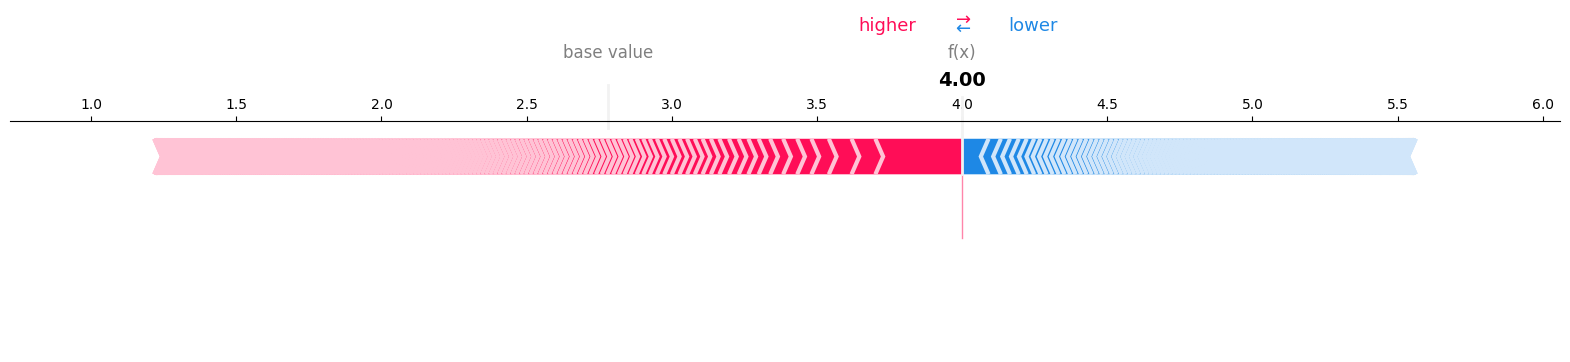

In [23]:
#convert your training and testing data using the TF-IDF vectorizer
tfidf_vectorizer = pipeline
tfidf_train = tfidf_vectorizer.transform(data.review) 
tfidf_test = tfidf_vectorizer.transform([high_rated])


model=clf

#shap apply
#first shorten the data & convert to data frame
X_test_sample = tfidf_test

X_train_sample = tfidf_train
X_train_sample = shap.sample(X_train_sample, 50)
sample_text = shap.sample(tfidf_test, 1)
 
SHAP_explainer = shap.KernelExplainer(model.predict, X_train_sample)
shap_vals = SHAP_explainer.shap_values(sample_text)
print(SHAP_explainer.expected_value)
# shap_plot = shap.force_plot(SHAP_explainer.expected_value, shap_vals,sample_text.toarray(), feature_names=tfidf_vectorizer.get_feature_names_out(), contribution_threshold=1)
shap.plots.force(SHAP_explainer.expected_value, shap_vals, contribution_threshold=0.4, matplotlib=True, show=True)
# shap_text = shap.text_plot(shap_vals[0])
# shap.plots.text(shap_vals)

In [16]:
shap_plot

In [20]:
#convert your training and testing data using the TF-IDF vectorizer
tfidf_vectorizer = pipeline
tfidf_train = tfidf_vectorizer.transform(data.review).toarray()
tfidf_test = tfidf_vectorizer.transform([high_rated]).toarray()


model=clf

#shap apply
#first shorten the data & convert to data frame
X_test_sample = tfidf_test

X_train_sample = tfidf_train
X_train_sample = shap.sample(X_train_sample, 50)
sample_text = shap.sample(tfidf_test, 1)
 
SHAP_explainer = shap.KernelExplainer(model.predict_proba, X_train_sample, link="identity")
shap_vals = SHAP_explainer(sample_text)
print(SHAP_explainer.expected_value)
shap_text = shap.text_plot(shap_vals[0,:,1])

  0%|          | 0/1 [01:29<?, ?it/s]


KeyboardInterrupt: 

In [15]:
sample_text

<1x21358 sparse matrix of type '<class 'numpy.float64'>'
	with 26 stored elements in Compressed Sparse Row format>

In [16]:
X_train_sample

<50x21358 sparse matrix of type '<class 'numpy.float64'>'
	with 723 stored elements in Compressed Sparse Row format>

In [1]:
#convert your training and testing data using the TF-IDF vectorizer
tfidf_vectorizer = pipeline
tfidf_train = tfidf_vectorizer.transform(data.review) 
tfidf_test = tfidf_vectorizer.transform([high_rated])


model=clf

#shap apply
#first shorten the data & convert to data frame
X_test_sample = tfidf_test

X_train_sample = tfidf_train
X_train_sample = shap.sample(X_train_sample, 50)
sample_text = shap.sample(tfidf_test, 1)
 
SHAP_explainer = shap.KernelExplainer(model.predict, X_train_sample, link="identity")
shap_vals = SHAP_explainer(sample_text)
print(SHAP_explainer.expected_value)
# shap_plot = shap.force_plot(SHAP_explainer.expected_value, shap_vals,sample_text.toarray(), feature_names=tfidf_vectorizer.get_feature_names_out())
shap_text = shap.text_plot(shap_vals, sample_text.toarray(), tfidf_vectorizer.get_feature_names_out())
# print(shap_vals)
# shap.plots.text(shap_vals)

NameError: name 'pipeline' is not defined

In [17]:
sample_text.toarray().dtype

dtype('float64')